In [1]:
#Importing libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU
from tensorflow.keras.activations import relu, sigmoid, hard_sigmoid, tanh, selu

In [2]:
#Importing dataset with features and target variable
try:        
    df = pd.read_csv('cardio_train.csv', sep = ';')
    df.head()
except IOError:
    print("Such file doesn't exist!")

In [3]:
#We will eliminate id it doesn't have effect of our prediction
df.drop('id', axis = 1, inplace = True)

In [4]:
#We will examine the null and missing values
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
#Now we need to drop duplicates from our dataset
df.drop_duplicates()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [7]:
summary = df.describe()
summary

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Correlation matrix to see relationship between variables
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


# Data Visualization

We will represent the histograms and box plots of continuous variables. 
Then we will see if there are outliers and how to handle with them.

### Age

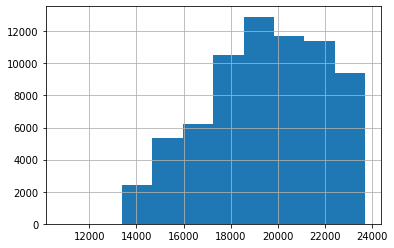

In [9]:
df.age.hist()

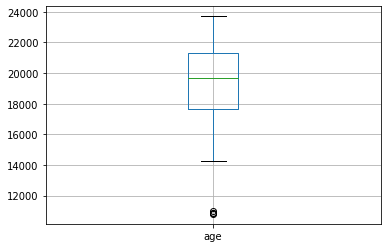

In [10]:
df.boxplot('age')

In [11]:
#We will define the function for calculating bounds of box plot
def bound_lower_upper(q_1,q_3):
    IQR = q_3 - q_1
    b_1 = q_1 - 1.5*IQR
    b_2 = q_3 + 1.5*IQR
    return b_1, b_2, IQR

In [12]:
bound_age = bound_lower_upper(summary['age'][4],summary['age'][6])
#Number of outliers
df_age_outlier = df[(df['age'] < bound_age[0]) | (df['age'] > bound_age[1])]
df_age_outlier

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6219,10878,1,175,59.0,120,80,1,1,0,0,1,0
22343,10798,2,175,92.0,100,60,1,1,0,0,1,0
30666,10859,1,159,59.0,120,80,1,1,0,0,1,0
55905,10964,1,160,59.0,110,70,1,1,0,0,1,0


In [13]:
#We will handle with this outlier values cupping them to the bounds values
for number in df_age_outlier['age']:
    df['age'].replace(number, bound_age[0], inplace = True)

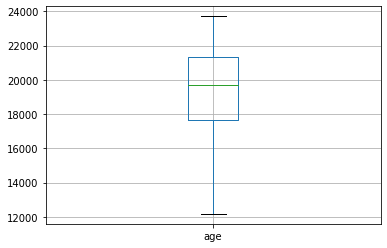

In [14]:
df.boxplot('age')

### Height

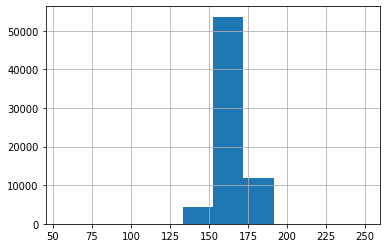

In [15]:
df.height.hist()

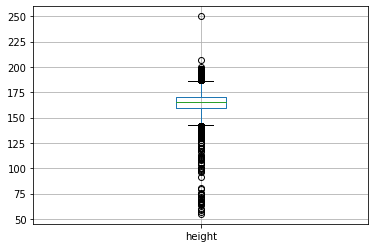

In [16]:
df.boxplot('height')

In [17]:
bound_height = bound_lower_upper(summary['height'][4],summary['height'][6])
#Number of outliers
df_height_outlier = df[(df['height'] < bound_height[0]) | (df['height'] > bound_height[1])]
df_height_outlier

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
62,20330.0,2,187,115.0,130,90,1,1,0,1,1,0
76,20397.0,2,188,105.0,120,80,1,1,0,0,1,1
224,21800.0,2,76,55.0,120,80,1,1,0,0,1,0
249,18220.0,1,142,61.0,120,80,1,1,0,0,1,0
781,23301.0,1,141,60.0,120,80,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69430,19040.0,1,140,52.0,150,80,2,1,0,0,1,1
69475,19261.0,2,187,73.0,120,80,1,3,0,0,1,0
69589,18286.0,2,192,83.0,110,70,1,1,0,1,0,0
69784,17541.0,1,141,44.0,100,70,1,1,0,0,1,0


In [18]:
#We will handle with this outlier values cupping them to the bounds values
for number in df_height_outlier['height']:
    if number < bound_height[0]:
        df['height'].replace(number, bound_height[0], inplace = True)
    else:
        df['height'].replace(number, bound_height[1], inplace = True)

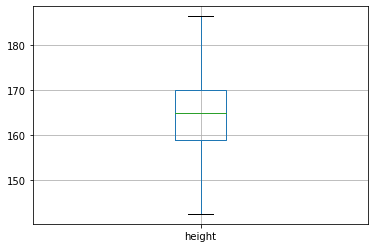

In [19]:
df.boxplot('height')

### Weight

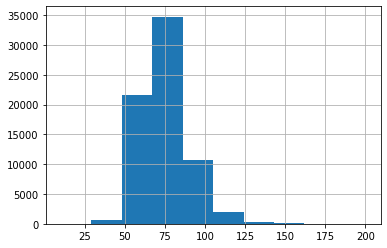

In [20]:
df.weight.hist()

In [21]:
df['weight_log'] = np.log(np.log(df.weight))
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log
0,18393.0,2,168.0,62.0,110,80,1,1,0,0,1,0,1.417583
1,20228.0,1,156.0,85.0,140,90,3,1,0,0,1,1,1.491251
2,18857.0,1,165.0,64.0,130,70,3,1,0,0,0,1,1.425247
3,17623.0,2,169.0,82.0,150,100,1,1,0,0,1,1,1.483130
4,17474.0,1,156.0,56.0,100,60,1,1,0,0,0,0,1.392612


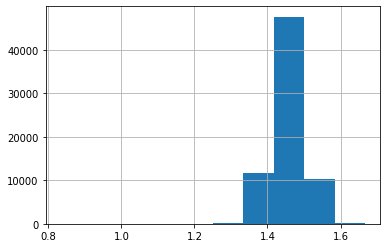

In [22]:
df.weight_log.hist()

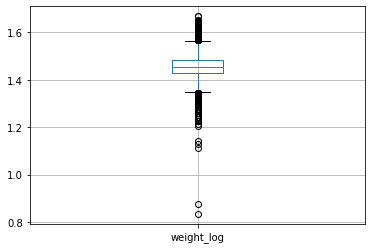

In [23]:
df.boxplot('weight_log')

In [24]:
q_1 = df.weight_log.quantile(q = 0.25)
q_3 = df.weight_log.quantile(q = 0.75)
bound_weight_log = bound_lower_upper(q_1, q_3)
#Number of outliers
df_weight_log_outlier = df[(df['weight_log'] < bound_weight_log[0]) | (df['weight_log'] > bound_weight_log[1])]
df_weight_log_outlier

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log
23,23376.0,2,156.0,45.0,110,60,1,1,0,0,1,0,1.336753
338,21078.0,1,157.0,142.0,120,80,1,1,0,0,1,1,1.600564
360,19803.0,1,144.0,44.0,130,80,1,1,0,0,1,0,1.330832
383,19517.0,1,147.0,41.0,80,50,1,1,0,0,1,0,1.311994
389,16718.0,2,165.0,169.0,120,80,1,1,0,0,1,0,1.635086
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69797,17575.0,1,164.0,45.0,115,70,1,1,0,0,1,0,1.336753
69851,14683.0,1,150.0,42.0,90,60,1,1,0,0,1,0,1.318462
69908,14823.0,1,152.0,42.0,120,80,1,1,0,0,1,0,1.318462
69919,17312.0,1,159.0,45.0,110,70,2,2,0,0,1,0,1.336753


In [25]:
#We will handle with this outlier values cupping them to the bounds values
for number in df_weight_log_outlier['weight_log']:
    if number < bound_weight_log[0]:
        df['weight_log'].replace(number, bound_weight_log[0], inplace = True)
    else:
        df['weight_log'].replace(number, bound_weight_log[1], inplace = True)

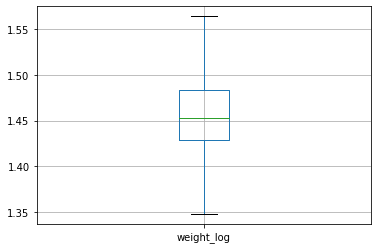

In [26]:
df.boxplot('weight_log')

### Ap_hi - Systolic blood pressure

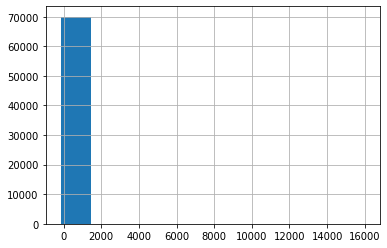

In [27]:
df.ap_hi.hist()

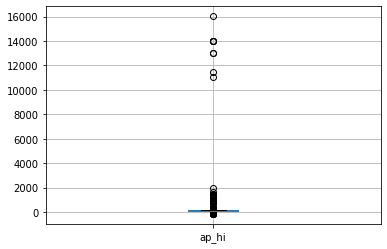

In [28]:
df.boxplot('ap_hi')

In [29]:
df['ap_hi_log'] = np.log(df.ap_hi)
df.head()

C:\Users\korisnik\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log,ap_hi_log
0,18393.0,2,168.0,62.0,110,80,1,1,0,0,1,0,1.417583,4.700480
1,20228.0,1,156.0,85.0,140,90,3,1,0,0,1,1,1.491251,4.941642
2,18857.0,1,165.0,64.0,130,70,3,1,0,0,0,1,1.425247,4.867534
3,17623.0,2,169.0,82.0,150,100,1,1,0,0,1,1,1.483130,5.010635
4,17474.0,1,156.0,56.0,100,60,1,1,0,0,0,0,1.392612,4.605170


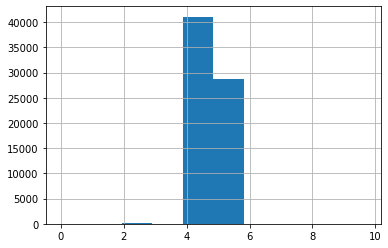

In [30]:
df.ap_hi_log.hist()

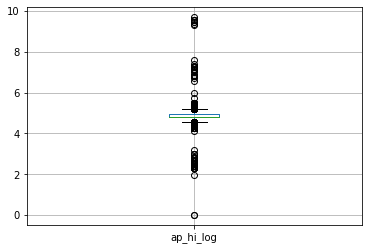

In [31]:
df.boxplot('ap_hi_log')

In [32]:
q_1_hi = df.ap_hi_log.quantile(q = 0.25)
q_3_hi = df.ap_hi_log.quantile(q = 0.75)
bound_ap_hi_log = bound_lower_upper(q_1_hi, q_3_hi)
#Number of outliers
df_ap_hi_log_outlier = df[(df['ap_hi_log'] < bound_ap_hi_log[0]) | (df['ap_hi_log'] > bound_ap_hi_log[1])]
df_ap_hi_log_outlier

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log,ap_hi_log
56,17407.0,1,171.0,76.0,90,60,1,2,0,0,1,0,1.465737,4.499810
59,20431.0,1,164.0,64.0,180,90,1,1,1,0,1,1,1.425247,5.192957
61,20960.0,2,165.0,75.0,180,90,3,1,0,0,1,1,1.462674,5.192957
101,18718.0,1,167.0,80.0,190,90,2,1,0,1,0,0,1.477511,5.247024
188,22527.0,1,165.0,67.0,90,60,1,1,0,0,1,0,1.436201,4.499810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69894,16857.0,1,160.0,70.0,200,100,1,2,0,0,1,1,1.446565,5.298317
69912,16002.0,1,155.0,48.0,90,70,1,1,0,0,1,0,1.353565,4.499810
69937,14489.0,1,160.0,53.0,90,60,1,1,0,0,1,0,1.378840,4.499810
69978,18800.0,1,163.0,78.0,90,60,1,1,0,0,1,1,1.471717,4.499810


In [33]:
#We will handle with this outlier values cupping them to the bounds values
for number in df_ap_hi_log_outlier['ap_hi_log']:
    if number < bound_ap_hi_log[0]:
        df['ap_hi_log'].replace(number, bound_ap_hi_log[0], inplace = True)
    else:
        df['ap_hi_log'].replace(number, bound_ap_hi_log[1], inplace = True)

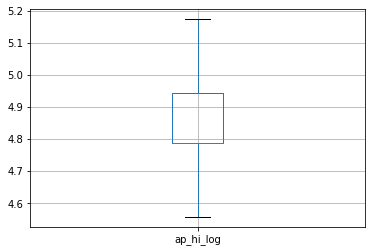

In [34]:
df.boxplot('ap_hi_log')

In [35]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log,ap_hi_log
age,1.000000,-0.022818,-0.086480,0.053676,0.020763,0.017645,0.154422,0.098700,-0.047647,-0.029733,-0.009913,0.238152,0.062071,0.213795
gender,-0.022818,1.000000,0.521870,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,0.168571,0.064402
height,-0.086480,0.521870,1.000000,0.305794,0.005391,0.005878,-0.054583,-0.020684,0.196185,0.097952,-0.008228,-0.012328,0.331307,0.020201
weight,0.053676,0.155406,0.305794,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.977364,0.273680
ap_hi,0.020763,0.006005,0.005391,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.031597,0.150184
ap_lo,0.017645,0.015254,0.005878,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.042289,0.148203
cholesterol,0.154422,-0.035821,-0.054583,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.138578,0.197492
gluc,0.098700,-0.020491,-0.020684,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.103020,0.093464
smoke,-0.047647,0.338135,0.196185,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,0.068892,0.027267
alco,-0.029733,0.170966,0.097952,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330,0.067756,0.032028


In [36]:
bound_ap_hi = bound_lower_upper(summary['ap_hi'][4],summary['ap_hi'][6])
#Number of outliers
df_ap_hi_outlier = df[(df['ap_hi'] < bound_ap_hi[0]) | (df['ap_hi'] > bound_ap_hi[1])]
df_ap_hi_outlier

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log,ap_hi_log
59,20431.0,1,164.0,64.0,180,90,1,1,1,0,1,1,1.425247,5.172868
61,20960.0,2,165.0,75.0,180,90,3,1,0,0,1,1,1.462674,5.172868
101,18718.0,1,167.0,80.0,190,90,2,1,0,1,0,0,1.477511,5.172868
209,18169.0,2,172.0,62.0,80,70,1,1,0,0,1,0,1.417583,4.556266
230,23376.0,2,175.0,75.0,180,100,3,1,1,1,1,1,1.462674,5.172868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69587,23223.0,1,169.0,101.0,180,110,1,1,0,0,0,1,1.529338,5.172868
69593,16781.0,2,179.0,93.0,180,100,1,2,0,1,1,1,1.511296,5.172868
69830,22552.0,2,163.0,67.0,180,100,2,1,0,0,0,1,1.436201,5.172868
69894,16857.0,1,160.0,70.0,200,100,1,2,0,0,1,1,1.446565,5.172868


In [37]:
#We need to compare results of correlation without transformation variable ap_hi with logarithm function
df['ap_hi_2'] = df.ap_hi
#We will handle with this outlier values cupping them to the bounds values
for number in df_ap_hi_outlier['ap_hi']:
    if number < bound_ap_hi[0]:
        df['ap_hi_2'].replace(number, bound_ap_hi[0], inplace = True)
    else:
        df['ap_hi_2'].replace(number, bound_ap_hi[1], inplace = True)

In [38]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log,ap_hi_log,ap_hi_2
age,1.000000,-0.022818,-0.086480,0.053676,0.020763,0.017645,0.154422,0.098700,-0.047647,-0.029733,-0.009913,0.238152,0.062071,0.213795,0.209277
gender,-0.022818,1.000000,0.521870,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,0.168571,0.064402,0.061737
height,-0.086480,0.521870,1.000000,0.305794,0.005391,0.005878,-0.054583,-0.020684,0.196185,0.097952,-0.008228,-0.012328,0.331307,0.020201,0.016543
weight,0.053676,0.155406,0.305794,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.977364,0.273680,0.271503
ap_hi,0.020763,0.006005,0.005391,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.031597,0.150184,0.150183
ap_lo,0.017645,0.015254,0.005878,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.042289,0.148203,0.150901
cholesterol,0.154422,-0.035821,-0.054583,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.138578,0.197492,0.197391
gluc,0.098700,-0.020491,-0.020684,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.103020,0.093464,0.092701
smoke,-0.047647,0.338135,0.196185,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,0.068892,0.027267,0.027281
alco,-0.029733,0.170966,0.097952,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330,0.067756,0.032028,0.032474


### Ap_lo - diastolic blood pressure

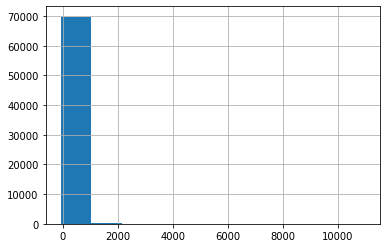

In [39]:
df.ap_lo.hist()

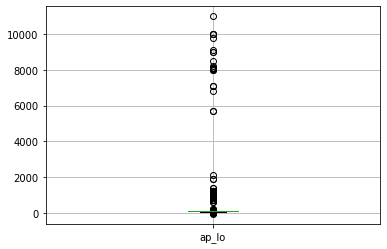

In [40]:
df.boxplot('ap_lo')

In [41]:
df['ap_lo_log'] = np.log(df.ap_lo)
df.head()

C:\Users\korisnik\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\korisnik\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log,ap_hi_log,ap_hi_2,ap_lo_log
0,18393.0,2,168.0,62.0,110,80,1,1,0,0,1,0,1.417583,4.700480,110,4.382027
1,20228.0,1,156.0,85.0,140,90,3,1,0,0,1,1,1.491251,4.941642,140,4.499810
2,18857.0,1,165.0,64.0,130,70,3,1,0,0,0,1,1.425247,4.867534,130,4.248495
3,17623.0,2,169.0,82.0,150,100,1,1,0,0,1,1,1.483130,5.010635,150,4.605170
4,17474.0,1,156.0,56.0,100,60,1,1,0,0,0,0,1.392612,4.605170,100,4.094345


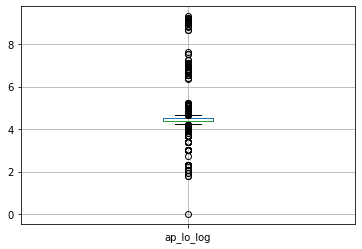

In [42]:
df.boxplot('ap_lo_log')

In [43]:
q_1_lo = df.ap_lo_log.quantile(q = 0.25)
q_3_lo = df.ap_lo_log.quantile(q = 0.75)
bound_ap_lo_log = bound_lower_upper(q_1_lo, q_3_lo)
#Number of outliers
df_ap_lo_log_outlier = df[(df['ap_lo_log'] < bound_ap_lo_log[0]) | (df['ap_lo_log'] > bound_ap_lo_log[1])]
df_ap_lo_log_outlier

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log,ap_hi_log,ap_hi_2,ap_lo_log
4,17474.0,1,156.0,56.0,100,60,1,1,0,0,0,0,1.392612,4.605170,100,4.094345
9,19834.0,1,164.0,68.0,110,60,1,1,0,0,0,0,1.439718,4.700480,110,4.094345
23,23376.0,2,156.0,45.0,110,60,1,1,0,0,1,0,1.347723,4.700480,110,4.094345
43,20556.0,2,159.0,63.0,120,60,1,1,0,0,1,1,1.421453,4.787492,120,4.094345
50,18238.0,1,160.0,75.0,100,60,1,1,0,0,0,0,1.462674,4.605170,100,4.094345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69929,19834.0,1,164.0,85.0,165,110,3,3,0,0,1,1,1.491251,5.105945,165,4.700480
69932,15243.0,2,171.0,67.0,110,60,1,1,0,0,1,0,1.436201,4.700480,110,4.094345
69937,14489.0,1,160.0,53.0,90,60,1,1,0,0,1,0,1.378840,4.556266,90,4.094345
69967,21416.0,2,168.0,63.0,140,1000,1,1,0,0,1,1,1.421453,4.941642,140,6.907755


In [44]:
#We will handle with this outlier values cupping them to the bounds values
for number in df_ap_lo_log_outlier['ap_lo_log']:
    if number < bound_ap_lo_log[0]:
        df['ap_hi_log'].replace(number, bound_ap_lo_log[0], inplace = True)
    else:
        df['ap_lo_log'].replace(number, bound_ap_lo_log[1], inplace = True)

In [45]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log,ap_hi_log,ap_hi_2,ap_lo_log
age,1.000000,-0.022818,-0.086480,0.053676,0.020763,0.017645,0.154422,0.098700,-0.047647,-0.029733,-0.009913,0.238152,0.062071,0.213795,0.209277,0.151134
gender,-0.022818,1.000000,0.521870,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,0.168571,0.064402,0.061737,0.067896
height,-0.086480,0.521870,1.000000,0.305794,0.005391,0.005878,-0.054583,-0.020684,0.196185,0.097952,-0.008228,-0.012328,0.331307,0.020201,0.016543,0.039998
weight,0.053676,0.155406,0.305794,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.977364,0.273680,0.271503,0.240477
ap_hi,0.020763,0.006005,0.005391,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.031597,0.150184,0.150183,0.076207
ap_lo,0.017645,0.015254,0.005878,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.042289,0.148203,0.150901,0.228454
cholesterol,0.154422,-0.035821,-0.054583,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.138578,0.197492,0.197391,0.147879
gluc,0.098700,-0.020491,-0.020684,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.103020,0.093464,0.092701,0.070702
smoke,-0.047647,0.338135,0.196185,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,0.068892,0.027267,0.027281,0.025770
alco,-0.029733,0.170966,0.097952,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330,0.067756,0.032028,0.032474,0.036465


In [46]:
bound_ap_lo = bound_lower_upper(summary['ap_lo'][4],summary['ap_lo'][6])
#Number of outliers
df_ap_lo_outlier = df[(df['ap_lo'] < bound_ap_lo[0]) | (df['ap_lo'] > bound_ap_lo[1])]
df_ap_lo_outlier

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log,ap_hi_log,ap_hi_2,ap_lo_log
4,17474.0,1,156.0,56.0,100,60,1,1,0,0,0,0,1.392612,4.605170,100,4.094345
9,19834.0,1,164.0,68.0,110,60,1,1,0,0,0,0,1.439718,4.700480,110,4.094345
23,23376.0,2,156.0,45.0,110,60,1,1,0,0,1,0,1.347723,4.700480,110,4.094345
43,20556.0,2,159.0,63.0,120,60,1,1,0,0,1,1,1.421453,4.787492,120,4.094345
50,18238.0,1,160.0,75.0,100,60,1,1,0,0,0,0,1.462674,4.605170,100,4.094345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69929,19834.0,1,164.0,85.0,165,110,3,3,0,0,1,1,1.491251,5.105945,165,4.676484
69932,15243.0,2,171.0,67.0,110,60,1,1,0,0,1,0,1.436201,4.700480,110,4.094345
69937,14489.0,1,160.0,53.0,90,60,1,1,0,0,1,0,1.378840,4.556266,90,4.094345
69967,21416.0,2,168.0,63.0,140,1000,1,1,0,0,1,1,1.421453,4.941642,140,4.676484


In [47]:
#We need to compare results of correlation without transformation variable ap_lo with logarithm function
df['ap_lo_2'] = df.ap_lo
#We will handle with this outlier values cupping them to the bounds values
for number in df_ap_lo_outlier['ap_lo']:
    if number < bound_ap_lo[0]:
        df['ap_lo_2'].replace(number, bound_ap_lo[0], inplace = True)
    else:
        df['ap_lo_2'].replace(number, bound_ap_lo[1], inplace = True)

In [48]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log,ap_hi_log,ap_hi_2,ap_lo_log,ap_lo_2
0,18393.0,2,168.0,62.0,110,80,1,1,0,0,1,0,1.417583,4.700480,110,4.382027,80
1,20228.0,1,156.0,85.0,140,90,3,1,0,0,1,1,1.491251,4.941642,140,4.499810,90
2,18857.0,1,165.0,64.0,130,70,3,1,0,0,0,1,1.425247,4.867534,130,4.248495,70
3,17623.0,2,169.0,82.0,150,100,1,1,0,0,1,1,1.483130,5.010635,150,4.605170,100
4,17474.0,1,156.0,56.0,100,60,1,1,0,0,0,0,1.392612,4.605170,100,4.094345,65


In [49]:
#One more correction method for outliers
#Replace values less then lower bound with q_1
#Replace values grater then upper bound with q_3
df['ap_lo_3'] = df['ap_lo']
#We will handle with this outlier values cupping them to the quartiles values
for number in df_ap_lo_outlier['ap_lo']:
    if number < bound_ap_lo[0]:
        df['ap_lo_3'].replace(number, summary['ap_lo'][4], inplace = True)
    else:
        df['ap_lo_3'].replace(number, summary['ap_lo'][6], inplace = True)

In [50]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log,ap_hi_log,ap_hi_2,ap_lo_log,ap_lo_2,ap_lo_3
age,1.000000,-0.022818,-0.086480,0.053676,0.020763,0.017645,0.154422,0.098700,-0.047647,-0.029733,-0.009913,0.238152,0.062071,0.213795,0.209277,0.151134,0.155753,0.147060
gender,-0.022818,1.000000,0.521870,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,0.168571,0.064402,0.061737,0.067896,0.067081,0.054265
height,-0.086480,0.521870,1.000000,0.305794,0.005391,0.005878,-0.054583,-0.020684,0.196185,0.097952,-0.008228,-0.012328,0.331307,0.020201,0.016543,0.039998,0.030476,0.014934
weight,0.053676,0.155406,0.305794,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.977364,0.273680,0.271503,0.240477,0.255518,0.231718
ap_hi,0.020763,0.006005,0.005391,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.031597,0.150184,0.150183,0.076207,0.081397,0.076182
ap_lo,0.017645,0.015254,0.005878,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.042289,0.148203,0.150901,0.228454,0.256213,0.127124
cholesterol,0.154422,-0.035821,-0.054583,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.138578,0.197492,0.197391,0.147879,0.166013,0.164981
gluc,0.098700,-0.020491,-0.020684,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.103020,0.093464,0.092701,0.070702,0.075770,0.072612
smoke,-0.047647,0.338135,0.196185,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,0.068892,0.027267,0.027281,0.025770,0.026987,0.024414
alco,-0.029733,0.170966,0.097952,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330,0.067756,0.032028,0.032474,0.036465,0.040700,0.037493


Now we can observe this correlation matrix. The most important variables are age, weight, ap_hi, ap_lo, cholesterol. 
But we will examine model with and without some of the less important variables and find the best prediction model. 

In [51]:
#One more way to see the feature importance for prediction
#Extra Tree Classifier for extracting the top features for the dataset
#We will define version 2 of our database and exclude redundant variables
df_v2 = df.drop(['weight', 'ap_hi', 'ap_hi_log', 'ap_lo', 'ap_lo_log', 'ap_lo_3', 'cardio'], axis = 1)



In [52]:
X_t = df_v2.iloc[:,:]  #independent variables
y_t = df.iloc[:,11:12]    #target column

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_t,y_t)

C:\Users\korisnik\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [54]:
print(model.feature_importances_)

[0.29551277 0.01160353 0.17616326 0.04150478 0.01485377 0.0065479
 0.00635135 0.00944262 0.17949692 0.1669481  0.09157501]


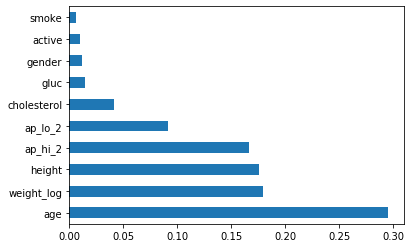

In [55]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_t.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

From previous graph we can see that we have a little different importance than in correlation matrix.  
The most important variables are age, weight_log, height, ap_hi, ap_lo and cholesterol.
Ap_hi_2 and ap_lo_2 are variables without outliers. 

# Data modeling

First we will try with to include all variables in model.
Then we will exclude less important variabes and check the accuracy and see behaviour of our model.

In [56]:
df_v2.head()

,age,gender,height,cholesterol,gluc,smoke,alco,active,weight_log,ap_hi_2,ap_lo_2
0,18393.0,2,168.0,1,1,0,0,1,1.417583,110,80
1,20228.0,1,156.0,3,1,0,0,1,1.491251,140,90
2,18857.0,1,165.0,3,1,0,0,0,1.425247,130,70
3,17623.0,2,169.0,1,1,0,0,1,1.483130,150,100
4,17474.0,1,156.0,1,1,0,0,0,1.392612,100,65


In [57]:
#Changing pandas dataframe to numpy array and preparing data for modeling
X = df_v2.iloc[:,lambda df: [0, 1, 2, 3, 4, 8, 9, 10]].values
y = df.iloc[:,11:12].values

Since we have different domain of variables, we need to unify it and we will do that normalazing data. 

In [58]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [59]:
#We need to change values of target variable in binary
#In our case it isn't necessary because we have just 0 and 1
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
y

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [61]:
# Neural network
model = Sequential()
model.add(Dense(8, input_dim=8, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

In [62]:
#Now we need to specify the loss function and the optimizer. 
#It is done using compile function in keras.
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [63]:
#Training model
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Train on 52500 samples
Epoch 1/100
52500/52500 [==============================] - 6s 119us/sample - loss: 0.6913 - accuracy: 0.5740
Epoch 2/100
52500/52500 [==============================] - 2s 29us/sample - loss: 0.6773 - accuracy: 0.6769
Epoch 3/100
52500/52500 [==============================] - 1s 28us/sample - loss: 0.6651 - accuracy: 0.7000
Epoch 4/100
52500/52500 [==============================] - 1s 29us/sample - loss: 0.6468 - accuracy: 0.7122
Epoch 5/100
52500/52500 [==============================] - 1s 28us/sample - loss: 0.6227 - accuracy: 0.7185
Epoch 6/100
52500/52500 [==============================] - 2s 29us/sample - loss: 0.5975 - accuracy: 0.7218
Epoch 7/100
52500/52500 [==============================] - 2s 29us/sample - loss: 0.5777 - accuracy: 0.7231
Epoch 8/100
52500/52500 [==============================] - 1s 28us/sample - loss: 0.5659 - accuracy: 0.7245
Epoch 9/100
52500/52500 [==============================] - 2s 30us/sample - loss: 0.5599 - accuracy: 0.7260
Epoc

52500/52500 [==============================] - 2s 32us/sample - loss: 0.5511 - accuracy: 0.7280
Epoch 77/100
52500/52500 [==============================] - 2s 31us/sample - loss: 0.5510 - accuracy: 0.7278
Epoch 78/100
52500/52500 [==============================] - 2s 30us/sample - loss: 0.5510 - accuracy: 0.7276
Epoch 79/100
52500/52500 [==============================] - 2s 33us/sample - loss: 0.5509 - accuracy: 0.7279
Epoch 80/100
52500/52500 [==============================] - 2s 30us/sample - loss: 0.5509 - accuracy: 0.7277
Epoch 81/100
52500/52500 [==============================] - 1s 28us/sample - loss: 0.5508 - accuracy: 0.7277
Epoch 82/100
52500/52500 [==============================] - 2s 33us/sample - loss: 0.5508 - accuracy: 0.7278
Epoch 83/100
52500/52500 [==============================] - 2s 34us/sample - loss: 0.5507 - accuracy: 0.7281
Epoch 84/100
52500/52500 [==============================] - 2s 33us/sample - loss: 0.5506 - accuracy: 0.7281
Epoch 85/100
52500/52500 [======

In [64]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [65]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 72.83428571428571


Now we will try to find the best model tuning parameters and using grid search CV.

In [96]:
#We need to define the list of optimizers and activations
param_grid_optimizer = {'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']}
param_grid_activation = {'activation': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']}
param_grid_batch_epochs = {'batch_size':[10, 20, 40, 60, 80, 100],
                          'epochs': [10, 50, 100],
                         } 
#list_neurons = [1, 5, 10, 15, 20, 25, 30] 
param_grid_drop_rate = {'dropout_rate': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

#### Tuning parameters

First we will tune the parameter of activation as follows:

In [80]:
from tensorflow.keras.layers import Dropout
def create_model(optimizer='adam', activation = 'relu', neurons = 1, dropout_rate=0.0):
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=8, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(2, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [75]:
# def create_model_2(optimizer='adam', activation = 'relu', neurons = 1, dropout_rate=0.0):
#     # create model
#     model = Sequential()
#     model.add(Dense(neurons, input_dim=8, activation=activation))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(1, activation='softmax'))
#     # Compile model
#     model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#     return model

In [87]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=64, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid_activation, n_jobs=-1, cv=3)


In [88]:
grid_result = grid.fit(X, y)
params = grid_result.cv_results_['params']
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']

In [89]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.733557 (0.001266) with: {'activation': 'softmax'}
0.733914 (0.002195) with: {'activation': 'softplus'}
0.730771 (0.001877) with: {'activation': 'softsign'}
0.733329 (0.001591) with: {'activation': 'relu'}
0.732943 (0.001258) with: {'activation': 'tanh'}
0.732714 (0.001449) with: {'activation': 'sigmoid'}
0.733071 (0.001232) with: {'activation': 'hard_sigmoid'}
0.726857 (0.000517) with: {'activation': 'linear'}


Let tune the parameter for optimization as follows:

In [90]:
grid_opt = GridSearchCV(estimator=model, param_grid=param_grid_optimizer, n_jobs=-1, cv=3)
grid_result_opt = grid_opt.fit(X, y)
params_opt = grid_result_opt.cv_results_['params']
means_opt = grid_result_opt.cv_results_['mean_test_score']
stds_opt = grid_result_opt.cv_results_['std_test_score']

In [91]:
for mean, stdev, param in zip(means_opt, stds_opt, params_opt):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.732243 (0.001737) with: {'optimizer': 'SGD'}
0.733357 (0.000379) with: {'optimizer': 'RMSprop'}
0.718214 (0.004461) with: {'optimizer': 'Adagrad'}
0.654743 (0.014811) with: {'optimizer': 'Adadelta'}
0.733257 (0.001827) with: {'optimizer': 'Adam'}
0.732957 (0.000700) with: {'optimizer': 'Adamax'}
0.733214 (0.000683) with: {'optimizer': 'Nadam'}


Let tune the parameter for dropout rate as follows:

In [92]:
grid_drop = GridSearchCV(estimator=model, param_grid=param_grid_drop_rate, n_jobs=-1, cv=3)
grid_result_drop = grid_drop.fit(X, y)
params_drop = grid_result_drop.cv_results_['params']
means_drop = grid_result_drop.cv_results_['mean_test_score']
stds_drop = grid_result_drop.cv_results_['std_test_score']

In [93]:
for mean, stdev, param in zip(means_drop, stds_drop, params_drop):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.732571 (0.001254) with: {'dropout_rate': 0.0}
0.731700 (0.001496) with: {'dropout_rate': 0.1}
0.730086 (0.001753) with: {'dropout_rate': 0.2}
0.729286 (0.001007) with: {'dropout_rate': 0.3}
0.729114 (0.001766) with: {'dropout_rate': 0.4}
0.728686 (0.000724) with: {'dropout_rate': 0.5}
0.726243 (0.001154) with: {'dropout_rate': 0.6}
0.724100 (0.000745) with: {'dropout_rate': 0.7}
0.722100 (0.002077) with: {'dropout_rate': 0.8}
0.722543 (0.005296) with: {'dropout_rate': 0.9}


We will tune batch size and number of epochs as follows:

In [97]:
model_batch_eph = KerasClassifier(build_fn=create_model, verbose=0)
grid_batch_eph = GridSearchCV(estimator=model, param_grid=param_grid_batch_epochs, n_jobs=-1, cv=3)
grid_result_batch_eph = grid_batch_eph.fit(X, y)

In [98]:
params_batch_eph = grid_result_batch_eph.cv_results_['params']
means_batch_eph = grid_result_batch_eph.cv_results_['mean_test_score']
stds_batch_eph = grid_result_batch_eph.cv_results_['std_test_score']
for mean, stdev, param in zip(means_batch_eph, stds_batch_eph, params_batch_eph):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.732086 (0.001771) with: {'batch_size': 10, 'epochs': 10}
0.732386 (0.000409) with: {'batch_size': 10, 'epochs': 50}
0.732686 (0.000553) with: {'batch_size': 10, 'epochs': 100}
0.730886 (0.001389) with: {'batch_size': 20, 'epochs': 10}
0.732414 (0.000749) with: {'batch_size': 20, 'epochs': 50}
0.732214 (0.001274) with: {'batch_size': 20, 'epochs': 100}
0.729600 (0.000195) with: {'batch_size': 40, 'epochs': 10}
0.733314 (0.000606) with: {'batch_size': 40, 'epochs': 50}
0.733557 (0.001033) with: {'batch_size': 40, 'epochs': 100}
0.730614 (0.001717) with: {'batch_size': 60, 'epochs': 10}
0.732429 (0.000767) with: {'batch_size': 60, 'epochs': 50}
0.733129 (0.001270) with: {'batch_size': 60, 'epochs': 100}
0.730671 (0.000725) with: {'batch_size': 80, 'epochs': 10}
0.732700 (0.000748) with: {'batch_size': 80, 'epochs': 50}
0.732271 (0.000846) with: {'batch_size': 80, 'epochs': 100}
0.731871 (0.001881) with: {'batch_size': 100, 'epochs': 10}
0.732214 (0.002649) with: {'batch_size': 100, 'epo